<a href="https://colab.research.google.com/github/Slzl/SVM/blob/main/Bike_Dataset_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [153]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [154]:
df = pd.read_csv('/content/bike_dataset[1].csv')

In [92]:
df.shape

(361, 9)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   model_name          361 non-null    object 
 1   price               361 non-null    int64  
 2   CC                  361 non-null    float64
 3   mileage             361 non-null    float64
 4   type_of_bike        361 non-null    object 
 5   weight_in_kg        361 non-null    int64  
 6   links               361 non-null    object 
 7   acceleration_speed  361 non-null    float64
 8   top_speed           361 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 25.5+ KB


In [94]:
df.isnull().sum()

model_name            0
price                 0
CC                    0
mileage               0
type_of_bike          0
weight_in_kg          0
links                 0
acceleration_speed    0
top_speed             0
dtype: int64

In [95]:
round(df.describe(),2)

,price,CC,mileage,weight_in_kg,acceleration_speed,top_speed
count,361.00,361.00,361.00,361.00,361.00,361.00
mean,839907.94,680.97,44.68,178.84,4.19,99.34
std,1052082.76,502.51,39.89,73.84,1.62,29.47
min,38000.00,87.80,8.00,55.00,1.01,25.00
25%,100000.00,199.60,20.00,118.00,3.30,93.84
50%,242000.00,680.97,30.00,169.00,4.19,99.34
75%,1459000.00,998.00,55.00,216.00,4.19,105.00
max,7990000.00,2458.00,320.00,433.00,13.80,200.00


In [55]:
print(df.head())

              model_name   price  CC  mileage   type_of_bike  weight_in_kg  \
0  Gravton Motors Quanta   99000 NaN    320.0  Electric Bike           100   
1      Simple Energy One  109999 NaN    236.0  Electric Bike           110   
2          Okaya Classiq   69900 NaN    200.0  Electric Bike            95   
3     Oben Electric Rorr  102999 NaN    200.0  Electric Bike           120   
4        Ola Electric S1   85099 NaN    181.0  Electric Bike           121   

                                               links  acceleration_speed  \
0  https://www.carandbike.com/gravton-motors-bike...                 4.2   
1  https://www.carandbike.com/simple-energy-bikes...                 3.6   
2     https://www.carandbike.com/okaya-bikes/classiq                 NaN   
3  https://www.carandbike.com/oben-electric-bikes...                 3.0   
4   https://www.carandbike.com/ola-electric-bikes/s1                 2.9   

   top_speed  
0       70.0  
1      100.0  
2       25.0  
3      100.0  

In [56]:
df = df.fillna(df.mean())

<ipython-input-56-04e87d67d337>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean())


In [84]:
X = df[['price', 'mileage', 'weight_in_kg', 'acceleration_speed', 'top_speed']]
y = df['type_of_bike']

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [88]:
svm_model = SVC(kernel='linear', C=1, random_state=42)

In [89]:
svm_model.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=42)

In [90]:
y_pred = svm_model.predict(X_test)

In [91]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.981651376146789


In [96]:
import pandas as pd
import matplotlib.pyplot as plt

Text(0, 0.5, 'top_speed')

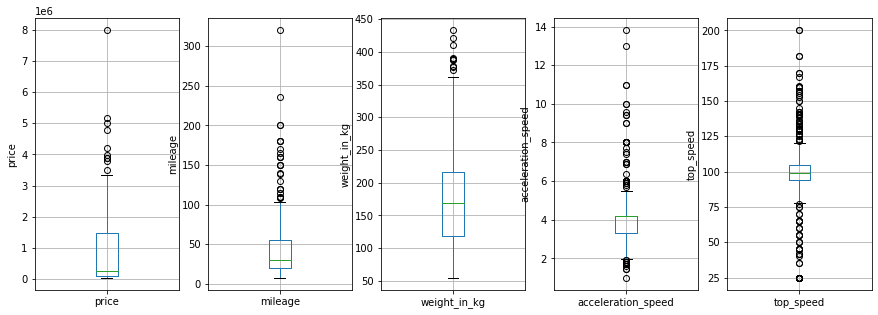

In [104]:
plt.figure(figsize=(15,5))
plt.subplot(1, 5, 1)
fig = df.boxplot(column='price')
fig.set_title('')
fig.set_ylabel('price')
plt.subplot(1, 5, 2)
fig = df.boxplot(column='mileage')
fig.set_title('')
fig.set_ylabel('mileage')
plt.subplot(1, 5, 3)
fig = df.boxplot(column='weight_in_kg')
fig.set_title('')
fig.set_ylabel('weight_in_kg')
plt.subplot(1, 5, 4)
fig = df.boxplot(column='acceleration_speed')
fig.set_title('')
fig.set_ylabel('acceleration_speed')
plt.subplot(1, 5, 5)
fig = df.boxplot(column='top_speed')
fig.set_title('')
fig.set_ylabel('top_speed')

In [102]:
num_cols = ['price', 'mileage', 'weight_in_kg', 'acceleration_speed', 'top_speed']

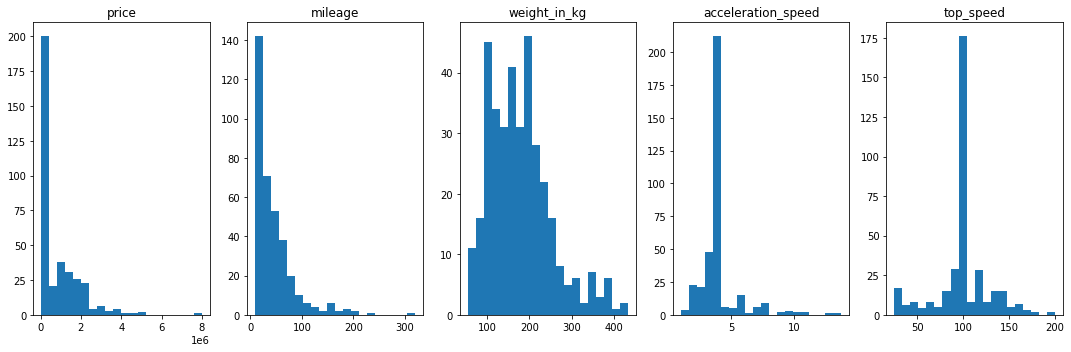

In [103]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 5))
for i, ax in enumerate(axes.flat):
    if i < len(num_cols):
        ax.hist(df[num_cols[i]], bins=20)
        ax.set_title(num_cols[i])
plt.tight_layout()
plt.show()